<h1>Hava Sıcaklık Tahmini Yapan Yapay Zeka</h1>

İlk olarak egitecegimiz problemi incelememizde fayda vardır. Problemimizi çözmek için bir makine öğrenmesi algoritması kullanacağız, makine öğrenmesi algoritması kullanacağız fakat problemi çözmeye başlamadan önce incelememiz gereken şey problemimizin çözümüne hangi metod ile ulaşacağımızdır. Bu metodun seçimini yapabilmek içinde veri setimizi incelemeliyiz.

In [401]:
import pandas

data = pandas.read_csv("temps.csv")

Veri setimizi inceleyebilmek için gerekli olan kütüphaneyi dahil edip veri setimizi okuduk.

In [402]:
data.head(7) #İlk 7 veri elemanımızı görüntüler

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41
5,2016,1,6,Wed,40,44,46.1,51,40
6,2016,1,7,Thurs,44,51,46.2,45,38


In [403]:
data.info() #Sütunlar hakkında daha detaylı bilgiye sahip olmak için kullandığımız bir fonksiyon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
year       348 non-null int64
month      348 non-null int64
day        348 non-null int64
week       348 non-null object
temp_2     348 non-null int64
temp_1     348 non-null int64
average    348 non-null float64
actual     348 non-null int64
friend     348 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 23.1+ KB


Yukarıda kullandığımız 2 fonksiyona bakarak verimiz ile ilgili gördüğümüz ilk şey 9 tane sütunumuzun(özellikte diyebiliriz) olduğudur. Daha dikkatli baktığımızda ise aslında problemimizin çözümünde nasıl bir metot kullanacağımızı farkedebiliriz. Kesin olarak çıkarımlarımızı konuşmak istersek __actual(gerçek)__ sütununa baktığımızda bunların o zamana ait gerçek sıcaklık değerleri olduğunu görebiliyoruz yani bu değerler bizim veri setimiz için etiket diyebileceğimiz değerlerdir, bizim etiketlerimiz var ise __supervised learning(denetimli öğrenme)__ metodunu kullanacağımızı anlıyoruz. __Denetimli öğrenme__ ile eğiteceğimizi biliyoruz fakat bu bir ___regression(regresyon)___ problemimi ___classification(sınıflandırma)___ problemimi? Bunuda etiketlerimize bakarak açıkça anlayabiliriz, burada herhangi bir sınıfa ait etiketler yok gerçek değer tahminleri var sizinde düşündüğünüz gibi sıcaklık tahmini yaparken bir sınıfa ait değerler söyleyemeyiz süregelen bir değer tahmini yaptığımız için ___regression___ yöntemini kullanacağımızı anlamış oluyoruz. <br>

Çıkarım olarak ___Denetimli öğrenmenin regresyon metodunu___ kullanacağımızı anlamış olduk.Bu metoda ait algoritmaların bırkaçı ile problemimizi çözüp en verimli algoritma ile modelimizi tamamlayacağız.

In [404]:
#Verimiz ile ilgili detaylı istatiksel bilgi
data.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


Aslında data.info() veya diğer fonksiyonlarla anlayabileceğimiz birşey olan ama tabiki rahat kullanım ve kesin bilgi olması açısından öğrenilmesi gereken bir fonksiyon verinin şeklini öğrenmeye yarayan fonksiyon kaç satır ve kaç sütundan oluştuğunu söyler.

In [405]:
data.shape
#data.shape[0] Sadece satır bilgisini verir
#data.shape[1] Sadece sütun bilgisini verir

(348, 9)

Verimiz ile ilgili bir problem olup düzeltmemiz gereken ___week sütunu___ object türündedir ve modelimizi eğitirken sayısal olmayan bir veriyi anlamasını bekleyemeyiz(Eğer eğittiğimiz model bir classification modeli olsaydı etiketlerimiz object türünde olabilirdi). O yüzden haftamızın günlerini one hot encode ismini verdiğimiz bir sayısal kodlama yöntemi ile sayısallaştıracağız. <br>

Bu yöntemden bahsedecek olursak : Haftanının 7 günü vardır. Haftanın ilk günü için pazartesi değeri 1 olur geri kalan günler 0 olur, haftanın ikinci günü için salı değeri 1 olur geri kalan günler 0 olur. Bu şekilde ilerler. <br>

Daha detaylı bir şekilde incelemek isteyenler için link aşağıdadır. <br>
[One Hot Encode Example](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [406]:
data = pandas.get_dummies(data) #One Hot Encode işlemini yapan kod bloğu

In [407]:
#Yaptığımız işlemi verimizin ilk 5 değerini yazdırarak görebiliriz.
data.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


<h2>Verimizi Grafikler ile İnceleyelim</h2>

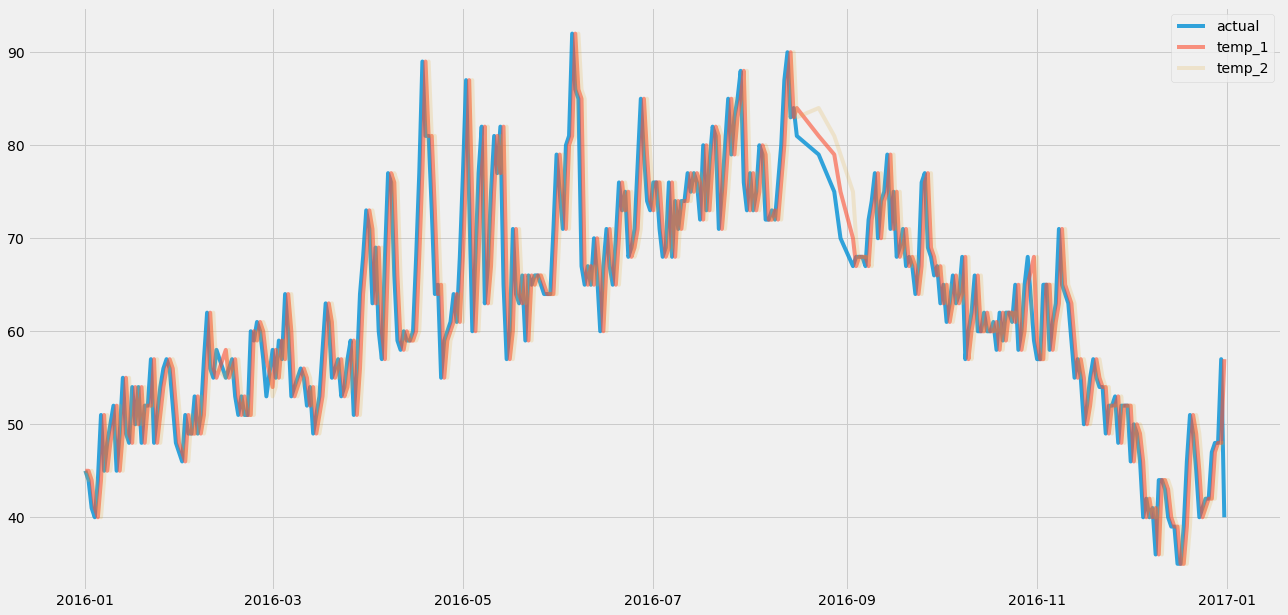

In [408]:
import matplotlib.pyplot as plt
import datetime

years = data['year']
months= data['month']
days = data['day']

dates = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]

plt.figure(figsize = (20,10))
plt.plot(dates,data.actual,alpha= 0.8)
plt.plot(dates,data.temp_1,alpha = 0.6)
plt.plot(dates,data.temp_2,alpha=0.2)
plt.legend()
plt.show()

<br>___Değerler birbiri ile çok farklı olmadığı için yukarıdaki grafik biraz karmaşık gözüküyor olabilir, istediğimiz görselliği elde edebilmek için subplot lara ayırıp grafik değerlerini yıl-ay dağılımına göre ayrı ayrı görselleştireceğiz.___<br><br>

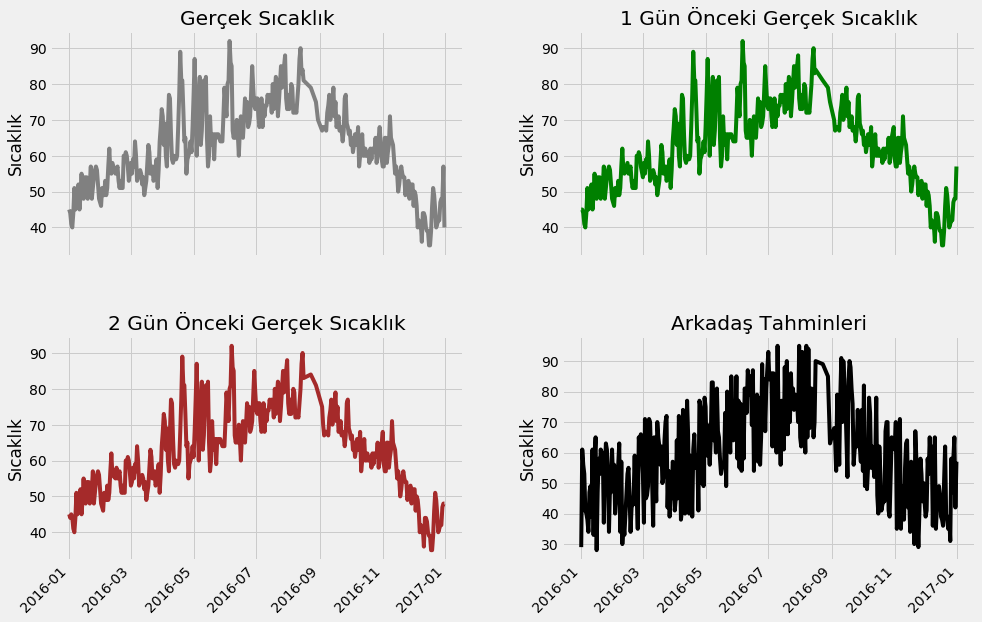

In [409]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize = (15,10))
fig.autofmt_xdate(rotation=45)

#Gerçek ölçülmüş sıcaklıklar
ax1.plot(dates,data['actual'],color='grey')
ax1.set_ylabel('Sıcaklık')
ax1.set_title('Gerçek Sıcaklık')

#1 gün önceki sıcaklıklar
ax2.plot(dates,data['temp_1'],color = 'green')
ax2.set_ylabel('Sıcaklık')
ax2.set_title('1 Gün Önceki Gerçek Sıcaklık')

#2 gün önceki sıcaklıklar
ax3.plot(dates,data['temp_2'],color = 'brown')
ax3.set_ylabel('Sıcaklık')
ax3.set_title('2 Gün Önceki Gerçek Sıcaklık')

#Arkadaş tahminleri
ax4.plot(dates,data['friend'],color = 'black')
ax4.set_ylabel('Sıcaklık')
ax4.set_title('Arkadaş Tahminleri')

plt.tight_layout(pad =4 )


Yapılan işlemlerden ve incelemelerden sonra daha önceden kullanılması gerektiğine kanaat getirdiğimiz ___metodun(Supervised Learning : Regression)___ algoritmaları ile tahminleri yapacak makine öğrenimi modellerimizi oluşturmaya başlayabiliriz. <br>

__İlk olarak veri setimizi eğitim ve test olarak 2 ye bölüyoruz.X olarak adlandırdıklarımız girdi, y olarak adlandırdıklarımız ise çıktı(etiket) verilerimizdir.__

In [410]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(data.drop('actual',axis=1),data.actual,test_size=0.25)

<h2>Linear Regression(Doğrusal Regresyon)</h2>

Doğrusal Regresyon 2 boyutlu olarak düşünürsek : 2 boyutlu düzlemdeki verilerimize en iyi uyan çizgi diyebiliriz, en iyi uyan çizgiden kastımız ise x degerleri için gerçeğe en yakın y değerini hesaplayandır. Yani doğrusal regresyon veri setimize en uygun çizgiyi bulmaya çalışır. m boyutlu bir veri kümesi içinse, bizim problemimiz gibi çok boyutlu ise algoritma en uygun düzlemi bulacaktır.

[Linear Regression(Doğrusal Regresyon) Detaylı Anlatım](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)

In [411]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression()
linear_model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

__Yukarıda doğrusal model adındaki modelimizi oluşturduk ardından modelimizi eğitim verilerimiz ile eğittik.__ Şimdide modelimizin, daha önceden seçtiğimiz rastgele test verilerini tahmin etmesini isteyeceğiz ve bu tahminin yüzdelik olarak başarı oranını hesaplayacağız. 

In [437]:
linear_test = linear_model.score(test_X,test_y)*100
linear_train = linear_model.score(train_X,train_y)*100

print("Modelimizin Test Verilerine Karşın Başarı Oranı : %"+str(linear_test))
print("Modelimizin Eğitim Verilerine Karşın Başarı Oranı : %"+str(linear_train))

Modelimizin Test Verilerine Karşın Başarı Oranı : %86.9503547861471
Modelimizin Eğitim Verilerine Karşın Başarı Oranı : %84.29456670474585


_Doğrusal Regresyon algoritmasını kullanarak oluşturduğumuz modelimizin başarı oranını elde ettik. Başka algoritmalar kullanarak yeni modeller oluşturmaya devam edelim._

<h2>Random Forest Regressor(Süregelen Tahminler için Rastgele Orman)</h2>

Random Forest Regressor rastgele bir orman yaratır,daha stabilize ve daha başarılı bir model yaratabilmek için karar ağaçlarını birleştirir ve bu ormana dahil eder.

In [413]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(train_X,train_y)

C:\Users\FX505\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [414]:
big_model = RandomForestRegressor(n_estimators =200,random_state = 42)
big_model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Yukarıda eğittimiz ilk model küçük bir orman ikinci model ise diğer modele göre büyük bir ormana sahip iki modeli karşılaştırıp büyük ormanın mı, yoksa küçük ormanın mı daha iyi sonuç verdiğini göreceğiz. Ormanın çok büyük olması modelin eğitim zamanı açısından problem yaratabilir.

In [415]:
rf_test = rf_model.score(test_X,test_y)*100
rf_train =rf_model.score(train_X,train_y)*100
big_test = big_model.score(test_X,test_y)*100
big_train = big_model.score(train_X,train_y)*100
print('Küçük Ormanın Test Verilerine Karşın Başarı Oranı: %'+str(rf_test))
print('Küçük Ormanın Eğitim Verilerine Karşın Başarı Oranı: %'+str(rf_train))
print('Büyük Ormanın Test Verilerine Karşın Başarı Oranı: %' +str(big_test))
print('Büyük Ormanın Eğitim Verilerine Karşın Başarı Oranı: %'+str(big_train))

Küçük Ormanın Test Verilerine Karşın Başarı Oranı: %84.7221585951627
Küçük Ormanın Eğitim Verilerine Karşın Başarı Oranı: %96.38426701477952
Büyük Ormanın Test Verilerine Karşın Başarı Oranı: %87.31506971076985
Büyük Ormanın Eğitim Verilerine Karşın Başarı Oranı: %97.20033876694522


<h2>Decision Trees(Karar Ağaçları)</h2>

Karar Ağaçları hedef eğitim verisinden basit karar kurallarına göre çıkarılan veri özelliklerini öğrenmeyi amaçlar. <br>
[Decision Trees(Karar Ağaçları) Detaylı Anlatım](https://scikit-learn.org/stable/modules/tree.html#regression)

In [416]:
from sklearn import tree

tree_model = tree.DecisionTreeRegressor()
tree_model.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [417]:
tree_test = tree_model.score(test_X,test_y)*100
tree_train = tree_model.score(train_X,train_y)*100
print('Karar Ağacının Test Verilerine Karşın Başarı Oranı: %'+str(tree_test))
print('Karar Ağacının Eğitim Verilerine Karşın Başarı Oranı: %'+str(tree_train))

Karar Ağacının Test Verilerine Karşın Başarı Oranı: %77.39241256347401
Karar Ağacının Eğitim Verilerine Karşın Başarı Oranı: %100.0


<h2>Support Vector Machines(Destek Vektör Makineleri)</h2>

In [418]:
from sklearn import svm

svm_model = svm.SVR(kernel='linear',C=0.3)
svm_model.fit(train_X,train_y)

SVR(C=0.3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [419]:
svm_test = svm_model.score(test_X,test_y)*100
svm_train = svm_model.score(train_X,train_y)*100
print('SVM in Test Verilerine Karşın Başarı Oranı: %'+str(svm_test))
print('SVM in Eğitim Verilerine Karşın Başarı Oranı: %'+str(svm_train))

SVM in Test Verilerine Karşın Başarı Oranı: %86.16856254176831
SVM in Eğitim Verilerine Karşın Başarı Oranı: %83.98082034688701


___4 farklı algoritma ile modelimizi eğittik. Şimdi ise hangi modelin bize daha çok başarı sağladığına bakacağız. Bu başarıyı grafikleştirerek incelemeyi tercih ediyorum.___
<br>
<h3>Test Verileri için Bar Grafiği</h3>

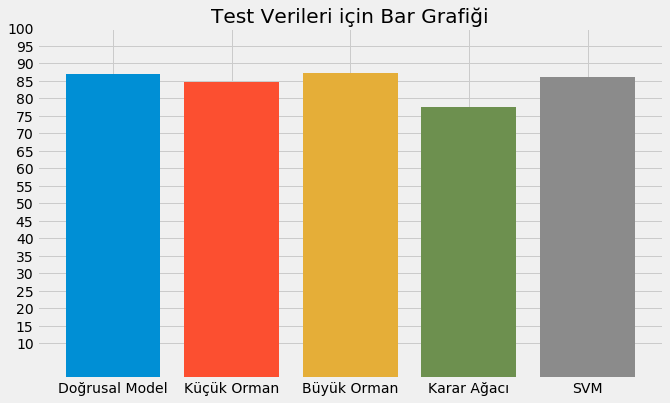

In [420]:
plt.figure(figsize=(10,6))
plt.bar("Doğrusal Model",linear_test)
plt.bar("Küçük Orman",rf_test)
plt.bar("Büyük Orman",big_test)
plt.bar("Karar Ağacı",tree_test)
plt.bar("SVM",svm_test)
plt.yticks([i for i in range(10,105,5)])
plt.title('Test Verileri için Bar Grafiği')
plt.show()

<h2>Eğitim Verileri için Bar Grafiği</h2>

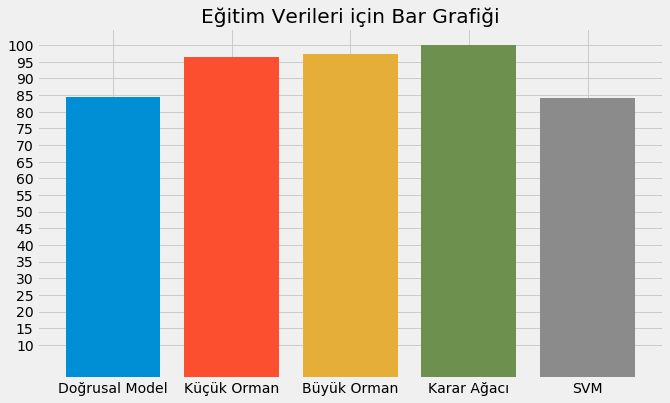

In [421]:
plt.figure(figsize=(10,6))
plt.title('Eğitim Verileri için Bar Grafiği')
plt.bar("Doğrusal Model",linear_train)
plt.bar("Küçük Orman",rf_train)
plt.bar("Büyük Orman",big_train)
plt.bar("Karar Ağacı",tree_train)
plt.bar("SVM",svm_train)
plt.yticks([i for i in range(10,105,5)])
plt.show()

___Test ve Eğitim verilerini göz önüne aldığımız zaman Büyük Ormanın en yüksek başarı oranına sahip olduğunu görüyoruz. Modelimizi gereksiz sütunlardan arındırıp, veri setimizi biraz daha temizleyip tekrar eğitelim ve elde edebileceğimiz en yüksek başarı oranını yakalamaya çalışalım.___

In [422]:
data.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


Verimize baktığımız zaman gün değişkeninin modelimizi yanıltma oranının yüksek olduğunu düşünüyorum. 1. gün ve 30.gün arasında bizim anlayışımıza göre bir problem olmasada makine sayısal analiz ettigi için makineye göre 29 fark var ve bu makineyi yanıltabilir.

In [423]:
new_model = RandomForestRegressor(n_estimators=200,random_state=42)
new_model.fit(train_X.drop('day',axis=1),train_y)

new_model_test = new_model.score(test_X.drop('day',axis=1),test_y)*100
new_model_train = new_model.score(train_X.drop('day',axis=1),train_y)*100

print('Yeni Modelimizin Test Verilerine Karşın Başarı Oranı: %'+str(new_model_test))
print('Yeni Modelimizin Eğitim Verilerine Karşın Başarı Oranı: %'+str(new_model_train))

Yeni Modelimizin Test Verilerine Karşın Başarı Oranı: %87.45443916159206
Yeni Modelimizin Eğitim Verilerine Karşın Başarı Oranı: %97.15916632693768


_Tahminlerimizi grafikte göstermek istersek._

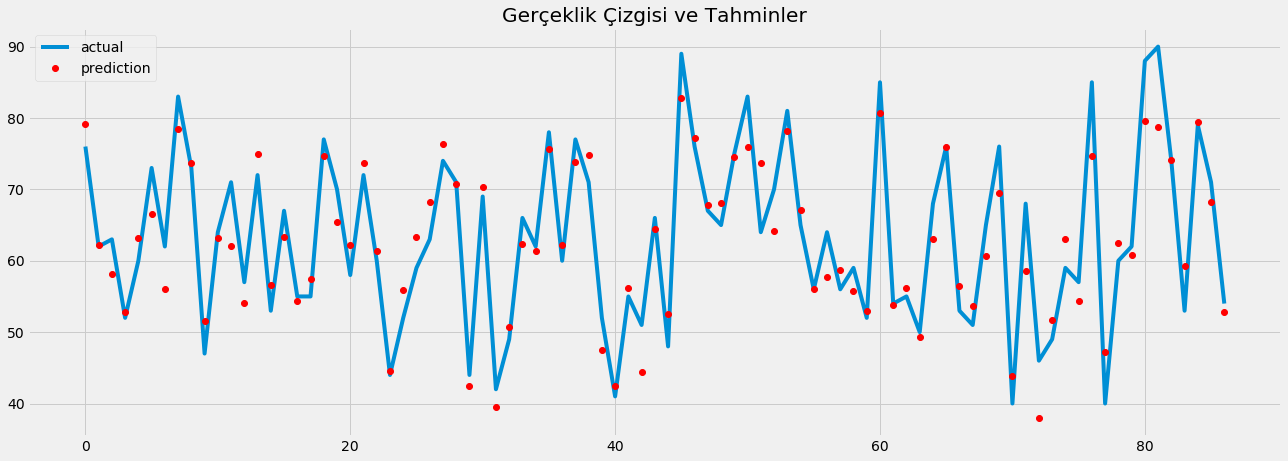

In [435]:
import numpy

new_model_predicts = new_model.predict(test_X.drop('day',axis=1))
actual_values = numpy.array(test_y)

years = test_X['year']
months= test_X['month']
days = test_X['day']

dates = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,"%Y-%m-%d") for date in dates]

actual_df = pandas.DataFrame(data={'date':dates,'actual':actual_values})
prediction_df = pandas.DataFrame(data={'date':dates,'prediction':new_model_predicts})

plt.figure(figsize = (20,7))
plt.plot([i for i in range(len(actual_values))],actual_df.actual)
plt.plot([i for i in range(len(new_model_predicts))],prediction_df.prediction,'ro')
plt.legend()
plt.title("Gerçeklik Çizgisi ve Tahminler")
plt.show()

Görüldüğü üzere sıcaklık tahmini yapan bir yapay zeka yapmak bu kadar kolay sütunları değiştirip, daha sağlıklı özellikler elde edersek bundan daha başarılı bir model eğitebiliriz. Fakat bu veri seti için bizim modelimizin başarısı bu safhada gayet iyi, hepimizin bildiği gibi _ne kadar çok veri o kadar güçlü bir yapay zeka(model)._ <br>
Çıkarımlar :  _Supervised Learning Regression_ algoritmaları kullanarak çeşitli modeller oluşturuldu, bazı algoritmalarda model üretiminde düzenlenebilecek önemli parametreler düzenlenip birden çok model üretildi. Grafik oluşturmak için gerekli kütüphaneler kullanıldı ve çeşitli grafikler oluşturuldu. Veri analizi yapıldı, veri manipülasyonu nasıl yapıldığı anlaşıldı. Oluşturulan modellerin kendileri arasında başarılılık oranı karşılaştırması yapıldı. En başarılı model seçilip ardından bu model veri setinde ufak oynamalar yapılarak tekrar eğitildi. Ardından modelin başarısını görebilmek amacıyla Gerçeklik çizgisi ve Model Tahminleri(noktalar) içeren bir grafik oluşturuldu model gözlemlendi.

<h2>Kaynakça</h2>

[Kullanılan Tüm Yapay Zeka Algoritmaları için](https://scikit-learn.org/stable/) <br>
[Kullanılan Grafik Kütüphanesi](https://matplotlib.org/) <br>
[Doğrusal Regresyon](https://medium.com/data-science-tr/makine-%C3%B6%C4%9Frenmesi-dersleri-4a-lineer-regresyon-30fe61248e93) <br>
[Support Vector Machine i anlamak](https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html) <br>
[Veri Seti](https://github.com/WillKoehrsen/Data-Analysis/tree/master/random_forest_explained/data)<br>